<a href="https://colab.research.google.com/github/VRX-Work/doc-info-extractor/blob/main/qwen_parser.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!apt-get install poppler-utils
!pip install pdf2image --no-cache-dir
!pip install transformers
!pip install qwen-vl-utils

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
poppler-utils is already the newest version (22.02.0-2ubuntu0.5).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.


In [ ]:
# Load model directly
from transformers import Qwen2VLForConditionalGeneration, AutoProcessor, TextIteratorStreamer
import torch
from qwen_vl_utils import process_vision_info

MODEL_ID = "Qwen/Qwen2-VL-2B-Instruct"
model = Qwen2VLForConditionalGeneration.from_pretrained(
    MODEL_ID,
    trust_remote_code=True,
    torch_dtype=torch.float16
).to("cuda").eval()

min_pixels = 256*28*28
max_pixels = 720*28*28
processor = AutoProcessor.from_pretrained("Qwen/Qwen2-VL-2B-Instruct", min_pixels=min_pixels, max_pixels=max_pixels)

The argument `trust_remote_code` is to be used with Auto classes. It has no effect here and is ignored.
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
`Qwen2VLRotaryEmbedding` can now be fully parameterized by passing the model config through the `config` argument. All other arguments will be removed in v4.46


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

In [ ]:
from pdf2image import convert_from_path

images = convert_from_path("/content/ce75e381ad6cf8b7d38ba9d422cebb09v1-Form PAS-3-06072022_signed.pdf")

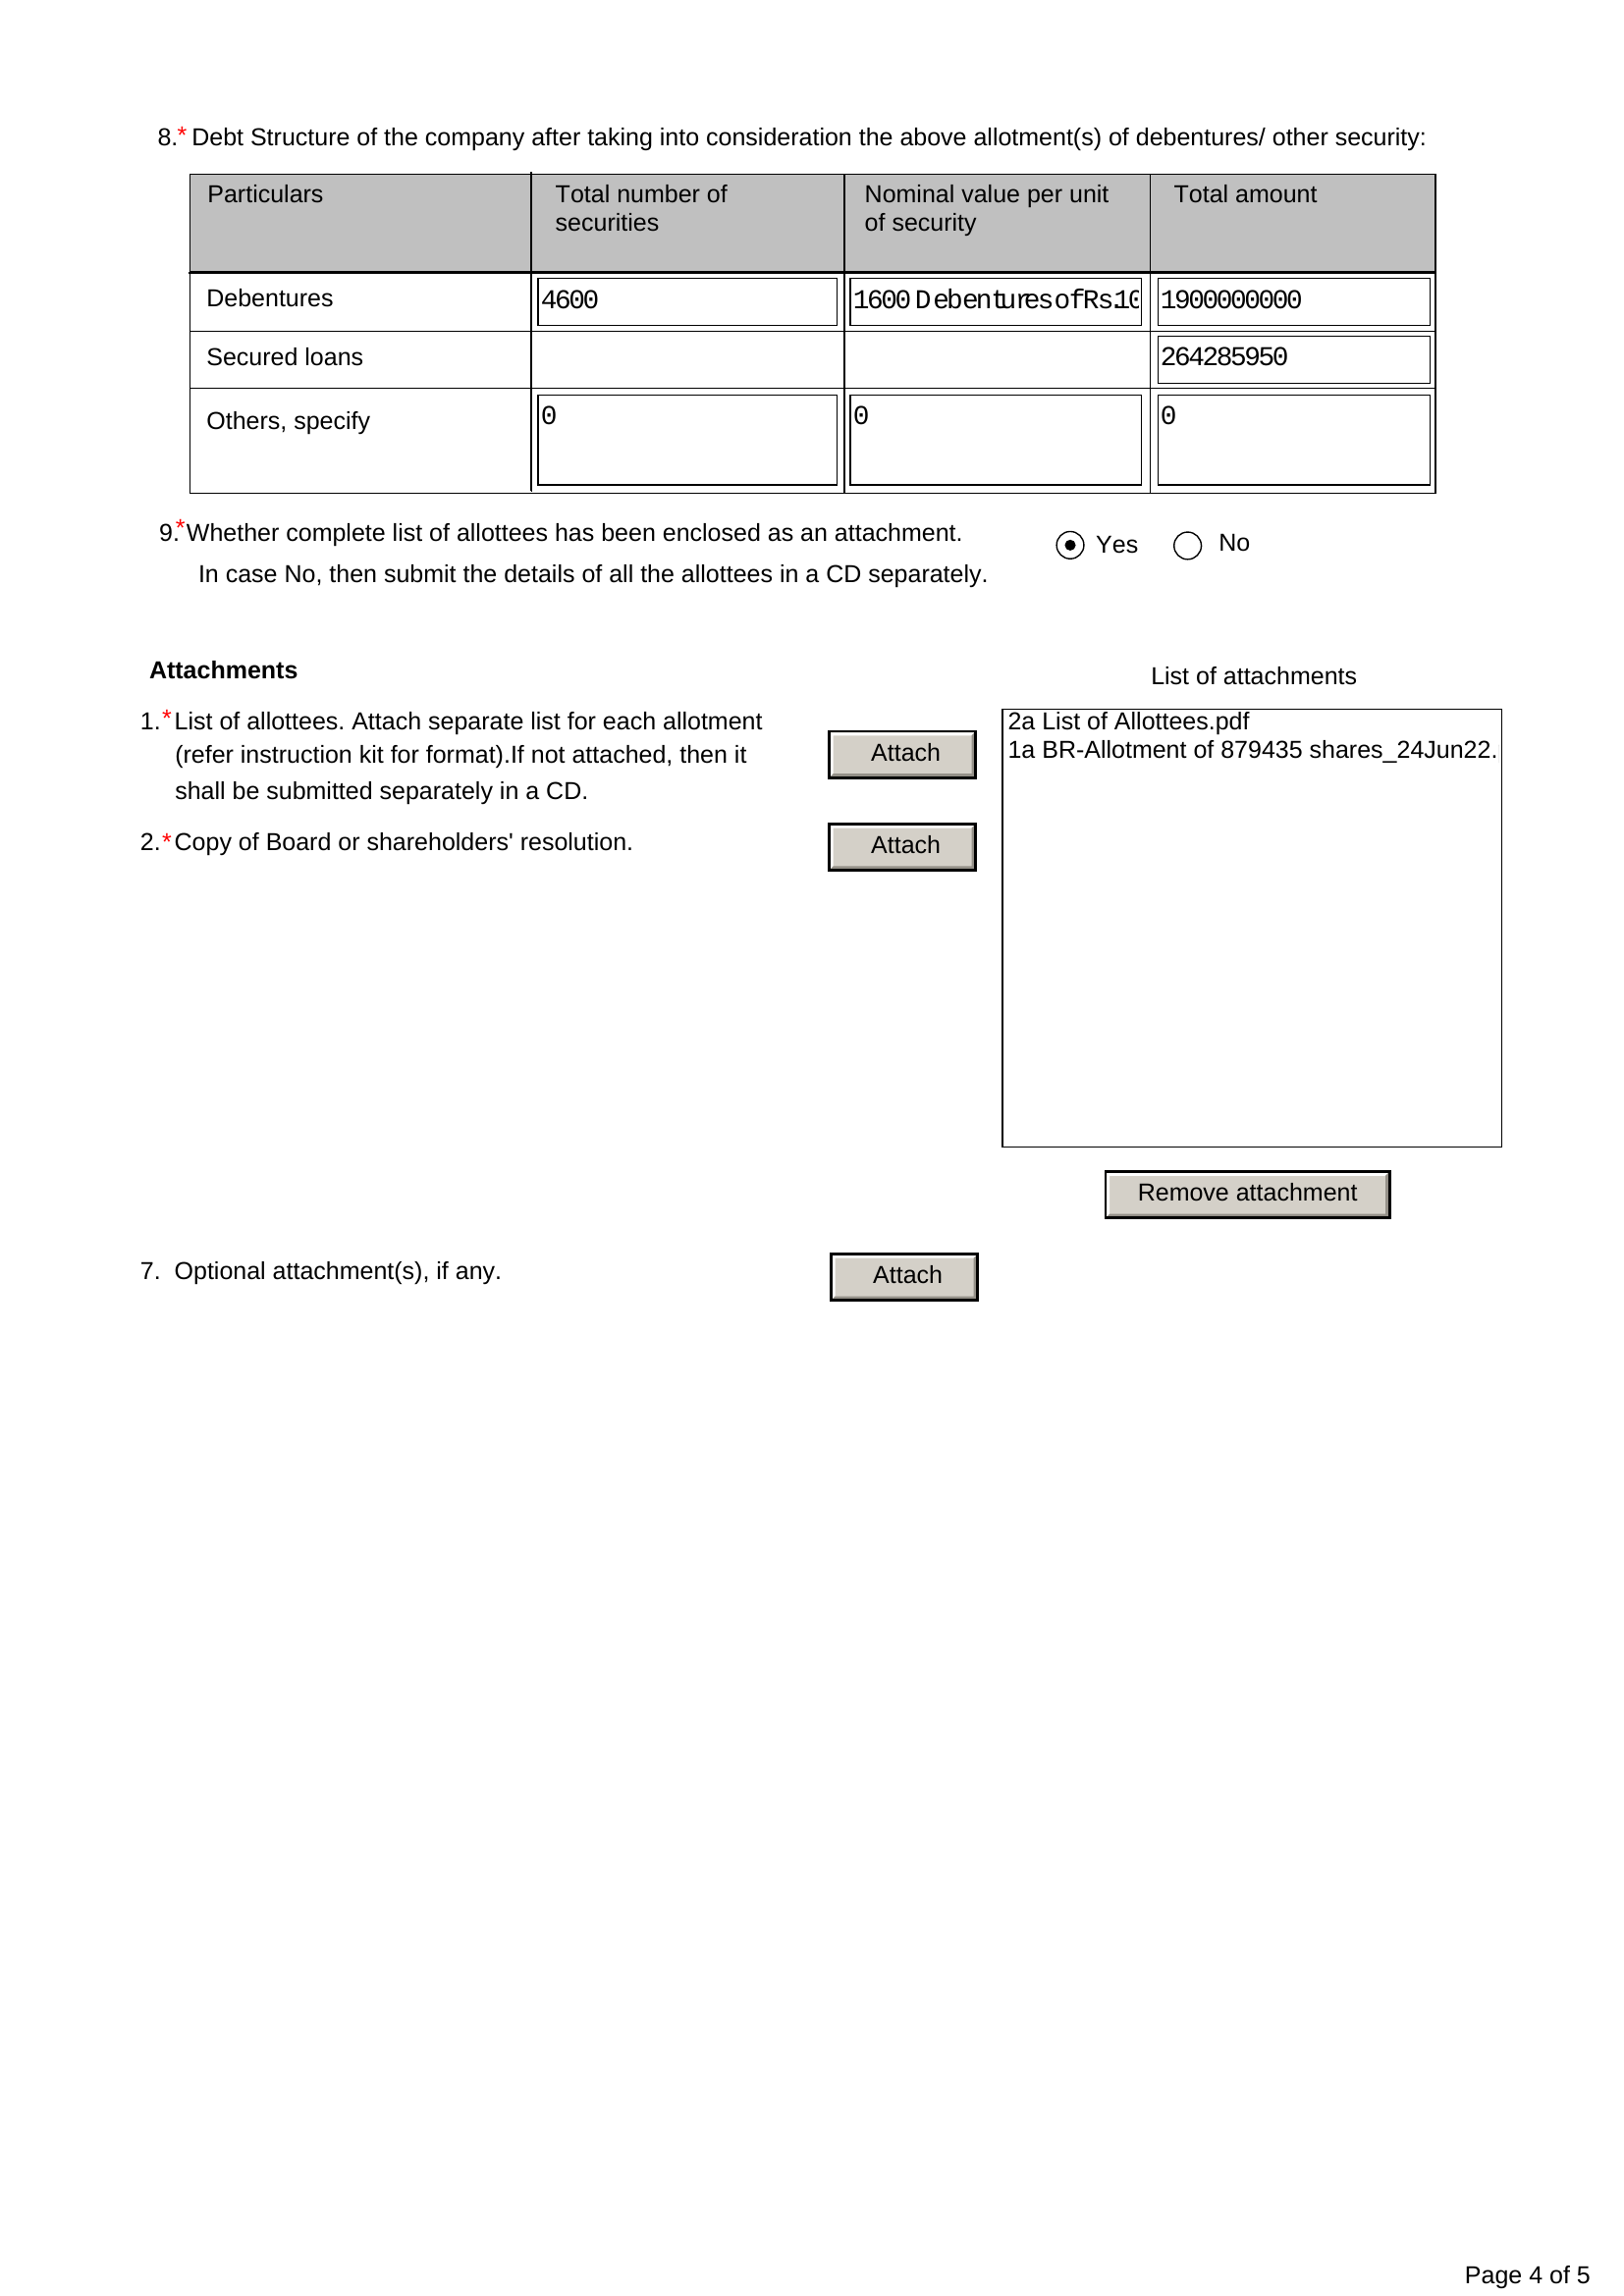

In [ ]:
images[3]

In [ ]:
images[3].save("sample.png", "PNG")

In [ ]:
messages = [
    {
        "role": "user",
        "content": [
            {
                "type": "image",
                "image": "/content/sample.png"
            },
            {"type": "text", "text": "From this image extract every single field and value and provide the output in this csv form file,value"},
        ],
    },
]

text = processor.apply_chat_template(messages, tokenize=False, add_generation_prompt=True)
image_inputs, video_inputs = process_vision_info(messages)
inputs = processor(
        text=[text],
        images=image_inputs,
        videos=video_inputs,
        padding=True,
        return_tensors="pt",
    ).to("cuda")

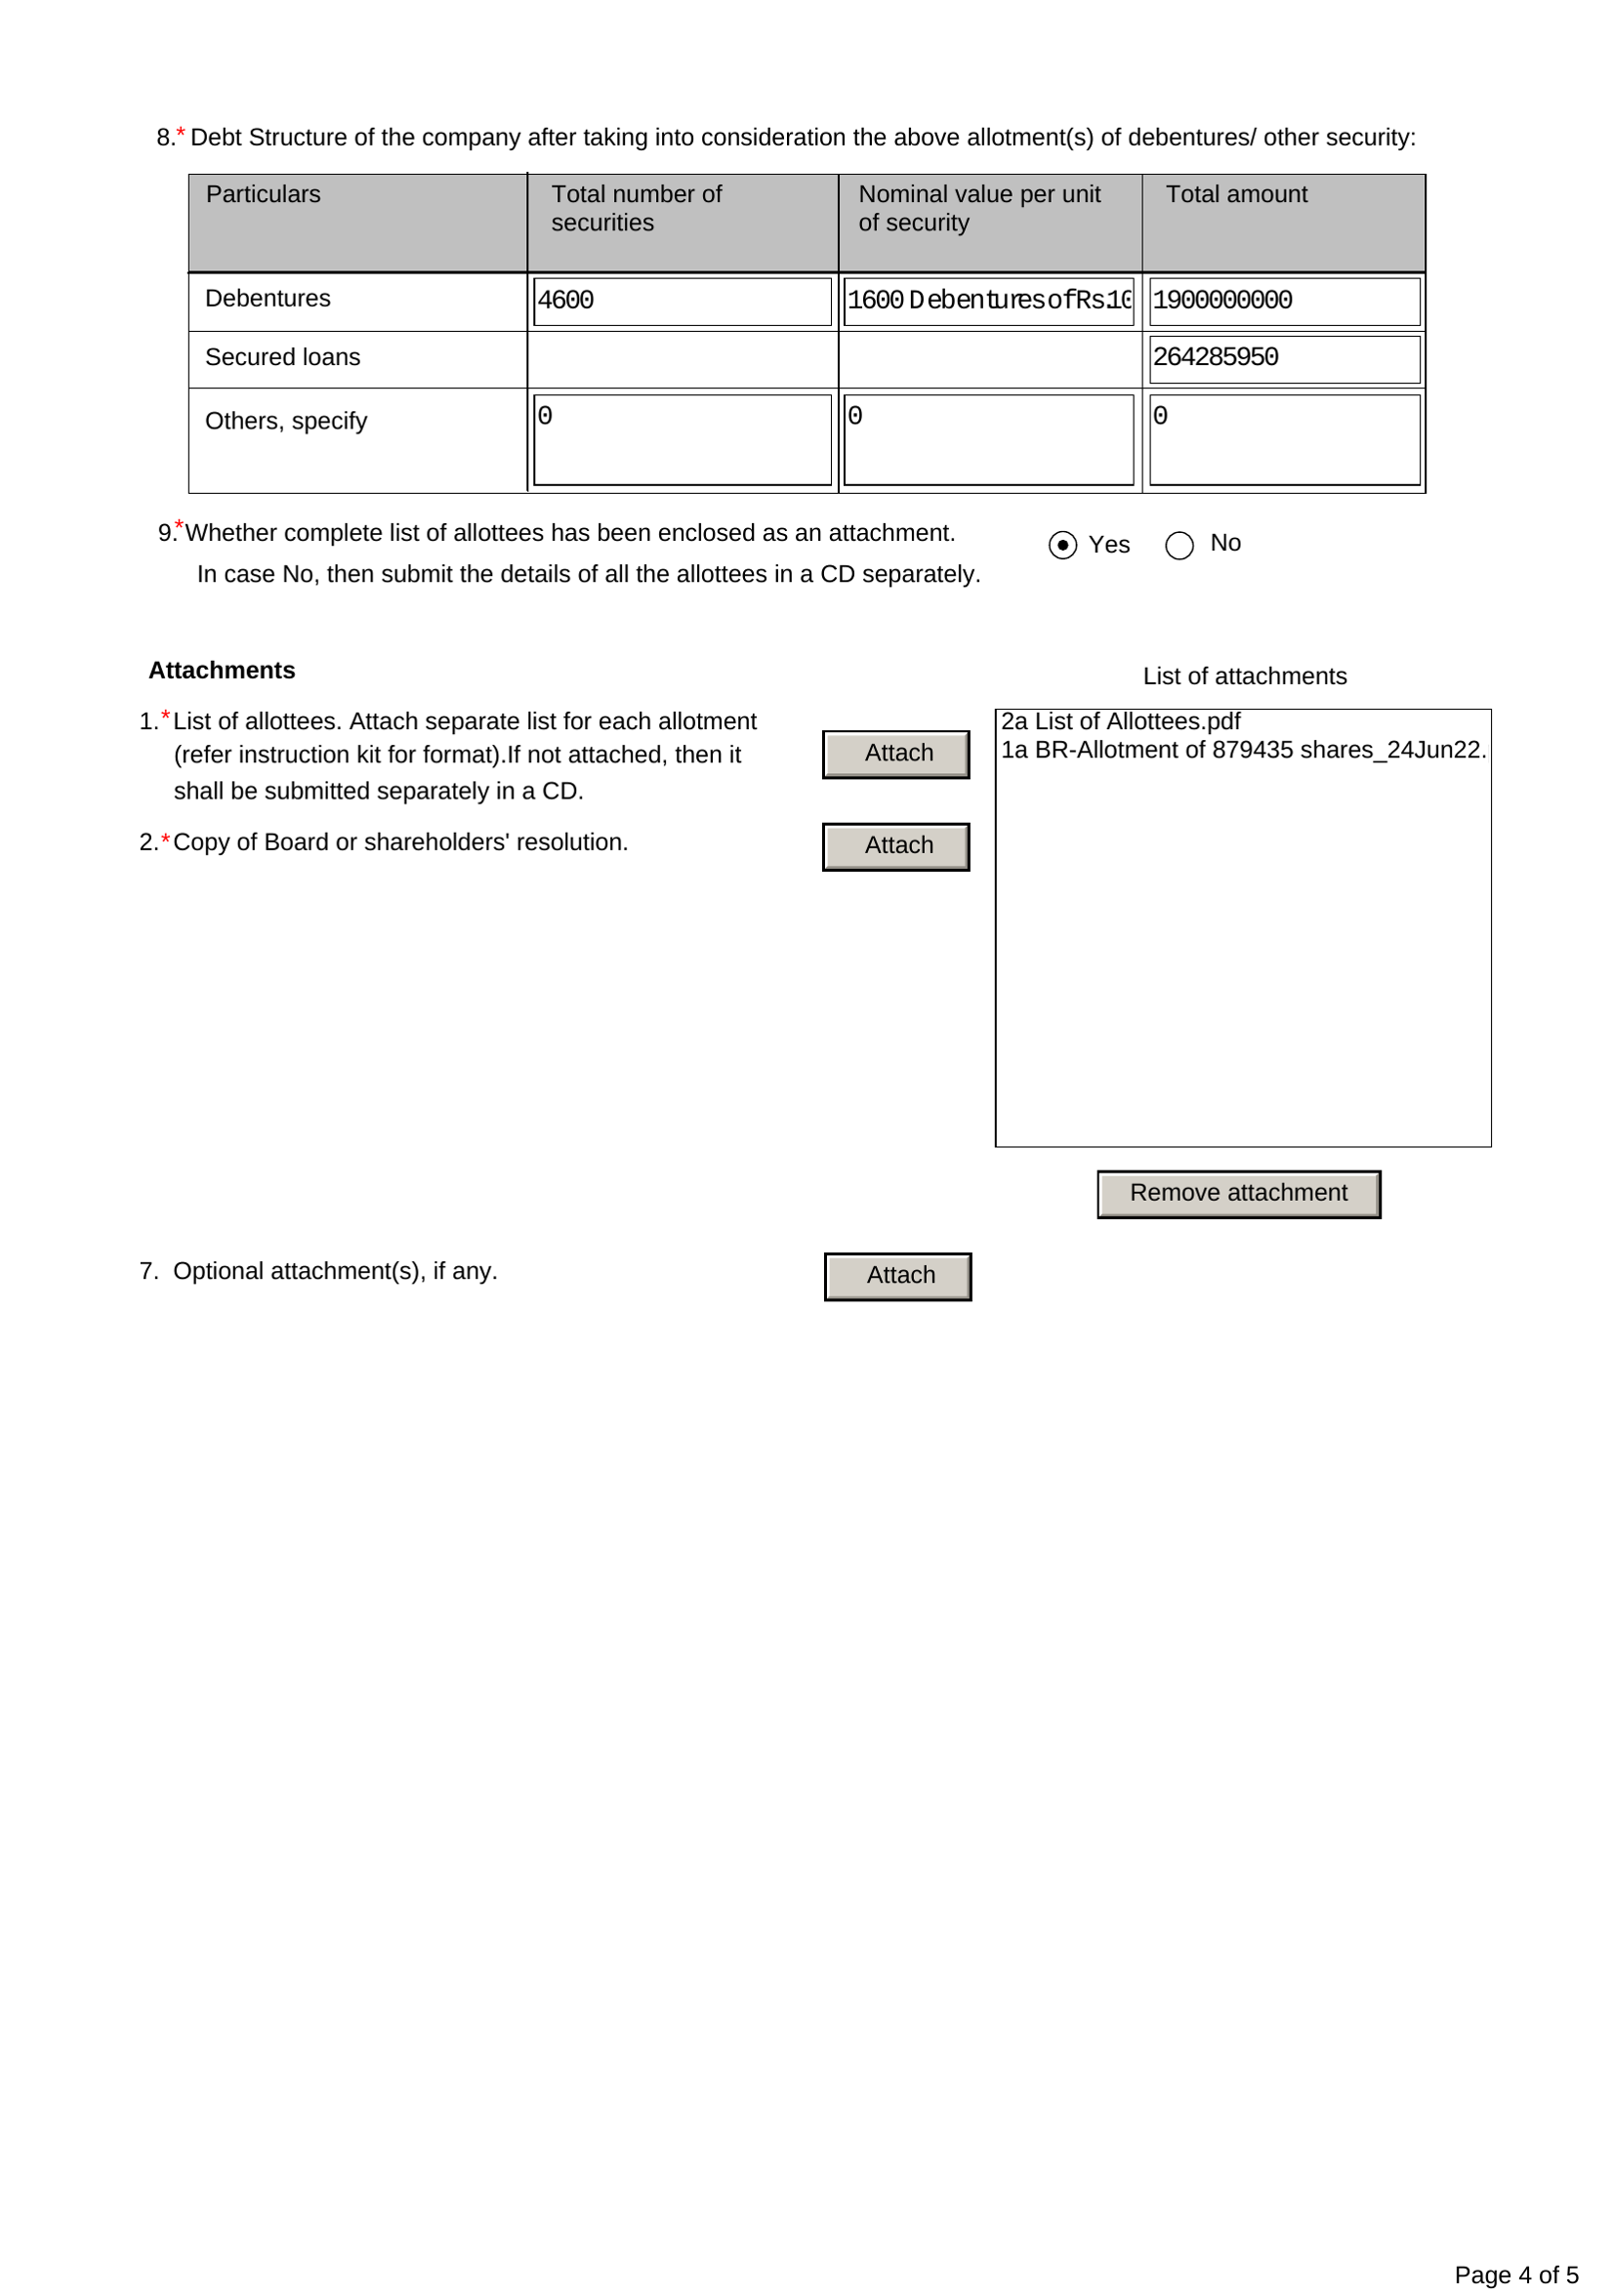

In [ ]:
image_inputs[0]

In [ ]:
generate_ids = model.generate(**inputs, max_new_tokens=1024)

In [ ]:
print(processor.batch_decode(generate_ids, skip_special_tokens=True, clean_up_tokenization_spaces=False)[0])

system
You are a helpful assistant.
user
From this image extract every single field and value and provide the output in this csv form file,value
assistant
|Field|Value|
|---|---|
|Particulars|Debentures|
|Total number of securities|4660|
|Nominal value per unit of security|1600|
|Total amount|1900000000|
|Secured loans|264285950|
|Others, specify|0|
|Yes|0|
|No|0|
|List of allottees|2a List of Allottees.pdf|
|1a BR-Allotment of 879435 shares_24Jun22.|
|Attach|Attach|
|Attach|Attach|
|Optional attachment(s), if any.|


|Field|Value|
|---|---|
|Particulars|Debentures|
|Total number of securities|4660|
|Nominal value per unit of security|1600|
|Total amount|1900000000|
|Secured loans|264285950|
|Others, specify|0|
|Yes|0|
|No|0|
|List of allottees|2a List of Allottees.pdf|
|1a BR-Allotment of 879435 shares_24Jun22.|
|Attach|Attach|
|Attach|Attach|
|Optional attachment(s), if any.|

In [ ]:
len(generate_ids[0])

830

# Main Implementation

In [ ]:
!apt-get install poppler-utils
!pip install pdf2image --no-cache-dir
!pip install transformers
!pip install qwen-vl-utils

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  poppler-utils
0 upgraded, 1 newly installed, 0 to remove and 49 not upgraded.
Need to get 186 kB of archives.
After this operation, 696 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 poppler-utils amd64 22.02.0-2ubuntu0.5 [186 kB]
Fetched 186 kB in 1s (196 kB/s)
Selecting previously unselected package poppler-utils.
(Reading database ... 123632 files and directories currently installed.)
Preparing to unpack .../poppler-utils_22.02.0-2ubuntu0.5_amd64.deb ...
Unpacking poppler-utils (22.02.0-2ubuntu0.5) ...
Setting up poppler-utils (22.02.0-2ubuntu0.5) ...
Processing triggers for man-db (2.10.2-1) ...
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.0/33.0 MB 49.4 MB/s eta 0:00:00


In [ ]:
from pdf2image import convert_from_path

images = convert_from_path("/content/ce75e381ad6cf8b7d38ba9d422cebb09v1-Form PAS-3-06072022_signed (1).pdf") # Input PDF

In [ ]:
# Load model directly
from transformers import Qwen2VLForConditionalGeneration, AutoProcessor, TextIteratorStreamer
import torch
from qwen_vl_utils import process_vision_info

MODEL_ID = "Qwen/Qwen2-VL-2B-Instruct"
model = Qwen2VLForConditionalGeneration.from_pretrained(
    MODEL_ID,
    trust_remote_code=True,
    torch_dtype=torch.float16
).to("cuda").eval()

min_pixels = 256*28*28
max_pixels = 720*28*28
processor = AutoProcessor.from_pretrained("Qwen/Qwen2-VL-2B-Instruct", min_pixels=min_pixels, max_pixels=max_pixels)

The argument `trust_remote_code` is to be used with Auto classes. It has no effect here and is ignored.
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/1.20k [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/56.4k [00:00<?, ?B/s]

model-00001-of-00002.safetensors:   0%|          | 0.00/3.99G [00:00<?, ?B/s]

model-00002-of-00002.safetensors:   0%|          | 0.00/429M [00:00<?, ?B/s]

`Qwen2VLRotaryEmbedding` can now be fully parameterized by passing the model config through the `config` argument. All other arguments will be removed in v4.46


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/272 [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/347 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/4.19k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/2.78M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/1.67M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/7.03M [00:00<?, ?B/s]

chat_template.json:   0%|          | 0.00/1.05k [00:00<?, ?B/s]

In [ ]:
# Inference Loop

responses = []

for idx, image in enumerate(images):
  image.save("sample.png", "PNG") # Await this in async

  # Pre-process Logic
  messages = [
    {
        "role": "user",
        "content": [
            {
                "type": "image",
                "image": "/content/sample.png"
            },
            {"type": "text", "text": "From this image extract every single field and value and provide the output in this csv form file,value"},
        ],
    },
  ]

  text = processor.apply_chat_template(messages, tokenize=False, add_generation_prompt=True)
  image_inputs, video_inputs = process_vision_info(messages)
  inputs = processor(
          text=[text],
          images=image_inputs,
          videos=video_inputs,
          padding=True,
          return_tensors="pt",
      ).to("cuda")

  # Inference here
  generate_ids = model.generate(**inputs, max_new_tokens=1024)
  response = processor.batch_decode(generate_ids, skip_special_tokens=True, clean_up_tokenization_spaces=False)[0]
  responses.append(response)

  del inputs # Free cuda cache


In [ ]:
print(responses[0])

system
You are a helpful assistant.
user
From this image extract every single field and value and provide the output in this csv form file,value
assistant
|Field|Value|
|---|---|
|Form No.| PAS-3|
|Language| English|
|Reference| Hindi|
|Instructions| Pre-fill|
|Corporate Identity Number (CIN)| U74999HR2015FTC056386|
|Global Location Number (GLN)| CARS24 SERVICES PRIVATE LIMITED|
|Address of the Registered office of the company| 10th Floor, Tower – B, Unitech Cyber Park, Sector - 39, Gurugram, Gurgaon, Haryana 122001|
|Email Id of the company| roc@cars24.com|
|Number of allotments| 1|
|Date of allotment| 24/06/2022|
|Date of passing shareholders' resolution| 24/06/2022|
|SRN of Form No. MGT-14| MGT-14|
|Preference shares| 1|
|Equity shares without Differential rights| 10|
|Equity Shares with Differential rights| 10|
|Debentures| 0|
|Brief particulars of terms and conditions| Pari-Passu to Existing Equity Shares|
|Number of securities allotted| 879435|
|Nominal amount per security| 10|
|

|Field|Value|
|---|---|
|Form No.| PAS-3|
|Language| English|
|Reference| Hindi|
|Instructions| Pre-fill|
|Corporate Identity Number (CIN)| U74999HR2015FTC056386|
|Global Location Number (GLN)| CARS24 SERVICES PRIVATE LIMITED|
|Address of the Registered office of the company| 10th Floor, Tower – B, Unitech Cyber Park, Sector - 39, Gurugram, Gurgaon, Haryana 122001|
|Email Id of the company| roc@cars24.com|
|Number of allotments| 1|
|Date of allotment| 24/06/2022|
|Date of passing shareholders' resolution| 24/06/2022|
|SRN of Form No. MGT-14| MGT-14|
|Preference shares| 1|
|Equity shares without Differential rights| 10|
|Equity Shares with Differential rights| 10|
|Debentures| 0|
|Brief particulars of terms and conditions| Pari-Passu to Existing Equity Shares|
|Number of securities allotted| 879435|
|Nominal amount per security| 10|
|Total nominal amount| 8794350|
|Amount paid per security on application (excluding premium)| 10|
|Total amount paid on application (excluding premium)| 8794350|
|Amount due and payable on allotment per security (excluding premium)| 0|
|Total Amount payable on allotment (excluding premium)| 0|
|Premium amount per security due and payable (if any)| 6661.87|
|Total premium amount due and payable (if any)| 5858680650|
|Premium amount paid per security (if any)| 6661.87|
|Total premium amount paid (if any)| 5858680650|
|Amount of discount per security (if any)| 0|
|Total discount amount (if any)| 0|
|Amount to be paid on calls per security (if any) (excluding premium)| 0|
|Total amount to be paid on calls (if any) (excluding premium)| 0|